不能把数据集都用做训练集，否则会导致模型在训练数据上表现很好，但是遇到其他数据集就不行了。所以数据集要  分为两部分，一部分是训练集，一部分是测试集。这样训练出来的模型既不会过拟合，又能具备一定的泛化能力。

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [21]:
x,y = make_blobs(
    n_samples = 300,
    n_features=2,
    centers=3,
    cluster_std=1,
    center_box=(-10,10),
    random_state = 233,
    return_centers=False
)
'''
n_samples = 300
说明：数据集将包含300个数据点

n_features = 2
说明：每个数据点是二维的，适合在二维平面上可视化

centers = 3
说明：数据将围绕3个不同的中心点聚集，形成3个簇

cluster_std = 1
说明：控制每个簇中点的分散程度。值越小，点越紧密；值越大，点越分散

center_box = [-10, 10]
说明：每个聚类中心的x和y坐标将在-10到10的范围内随机选择

random_state = 233
说明：确保每次运行代码时生成相同的数据集，便于结果复现

return_centers = False
说明：设为False表示只返回数据点，不返回中心点坐标
'''

'\nn_samples = 300\n说明：数据集将包含300个数据点\n\nn_features = 2\n说明：每个数据点是二维的，适合在二维平面上可视化\n\ncenters = 3\n说明：数据将围绕3个不同的中心点聚集，形成3个簇\n\ncluster_std = 1\n说明：控制每个簇中点的分散程度。值越小，点越紧密；值越大，点越分散\n\ncenter_box = [-10, 10]\n说明：每个聚类中心的x和y坐标将在-10到10的范围内随机选择\n\nrandom_state = 233\n说明：确保每次运行代码时生成相同的数据集，便于结果复现\n\nreturn_centers = False\n说明：设为False表示只返回数据点，不返回中心点坐标\n'

In [22]:
x,x[:,0]

(array([[  2.71138601,   9.51048379],
        [  0.70152431,   8.88406729],
        [ -8.49773769,   8.19693106],
        [ -2.3642783 ,  -8.45525113],
        [ -8.55232962,   7.36353934],
        [  1.95737237,   8.25544741],
        [  2.30244074,   7.59106788],
        [  1.95111159,   8.94209356],
        [  0.65320337,   7.68876285],
        [ -7.29724166,   9.29731697],
        [ -2.23848788,  -7.08767948],
        [  1.90189785,   7.80813825],
        [ -6.39886457,   6.78475373],
        [ -7.10700288,   6.86808574],
        [  1.8070686 ,   6.0791725 ],
        [  3.18866401,   7.49735605],
        [  2.37500477,   7.2036737 ],
        [ -1.78453078,  -6.83363796],
        [ -2.05747816,  -6.74323938],
        [  2.51863415,   7.2313274 ],
        [ -0.6054692 ,   7.68733912],
        [ -7.1608247 ,   7.99990111],
        [ -4.75622422,  -6.48715373],
        [ -4.38042089,  -5.62430131],
        [ -6.24826821,   7.57580835],
        [  2.00986002,   9.71712627],
        [ -2

### 处理数据集

##### 1首先打乱数据集的原有顺序同时不破坏原有数据，这里可以使用他的索引
**原理**：  
很多真实数据集是按某种规则排序的，比如：
 - 按时间顺序排列（时间序列） 
 - 按类别顺序排列（比如前1000条是类别0，中间1000条是类别1，后1000条是类别2） 
 - 按采集地点、用户ID、价格等排序

如果你直接按顺序切分（比如前80%做训练，后20%做测试），就相当于： 
 - 训练集全是“早期的/低类别/低价格”的样本  
 - 测试集全是“晚期的/高类别/高价格”的样本

保证训练集和测试集来自同一分布

In [23]:
def dataset_split(x,y,train_size=0.7,random_state=None):
    if random_state:
        np.random.seed(random_state)
    shuffle_index = np.random.permutation(len(x))#创建一个x长度数组并打乱
    train_index = shuffle_index[:int(len(x) * train_size)]
    test_index = shuffle_index[int(len(x) * train_size):]
    return x[train_index],x[test_index],y[train_index],y[test_index]

In [24]:
x_train,x_test,y_train,y_test= dataset_split(x,y)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

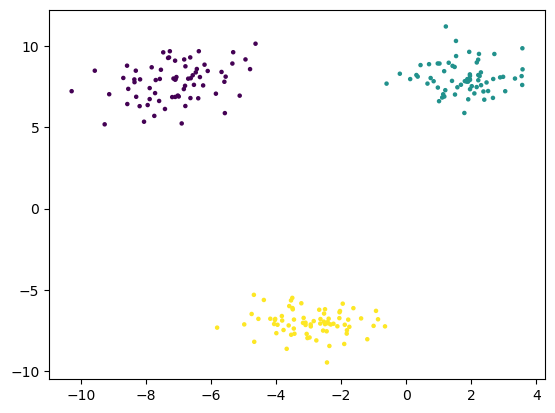

In [29]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,s=5) #c是颜色的种类，s是点的大小
plt.show()

In [26]:
from collections import Counter

In [30]:
Counter(y_train) # 这种划分方式，可能导致数据分类不均匀

Counter({np.int64(2): 73, np.int64(0): 70, np.int64(1): 67})

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=1,stratify=y)
# 这里使用stratify=y可以保障分类是均匀的